In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Load downloaded dataset

In [18]:
diamonds = pd.read_csv('diamonds_renamed_cols.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,lenght_x,width_y,depth_z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Basic data features

In [19]:
diamonds.shape

(53940, 10)

In [20]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat       53940 non-null float64
cut         53940 non-null object
color       53940 non-null object
clarity     53940 non-null object
depth       53940 non-null float64
table       53940 non-null float64
price       53940 non-null int64
lenght_x    53940 non-null float64
width_y     53940 non-null float64
depth_z     53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [21]:
diamonds.describe()

,carat,depth,table,price,lenght_x,width_y,depth_z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Value counts for text attributes

In [22]:
diamonds_text_att = ['cut', 'color', 'clarity']

In [23]:
print([diamonds[x].value_counts() for x in diamonds_text_att])

[Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64, G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64, SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64]


### Histograms

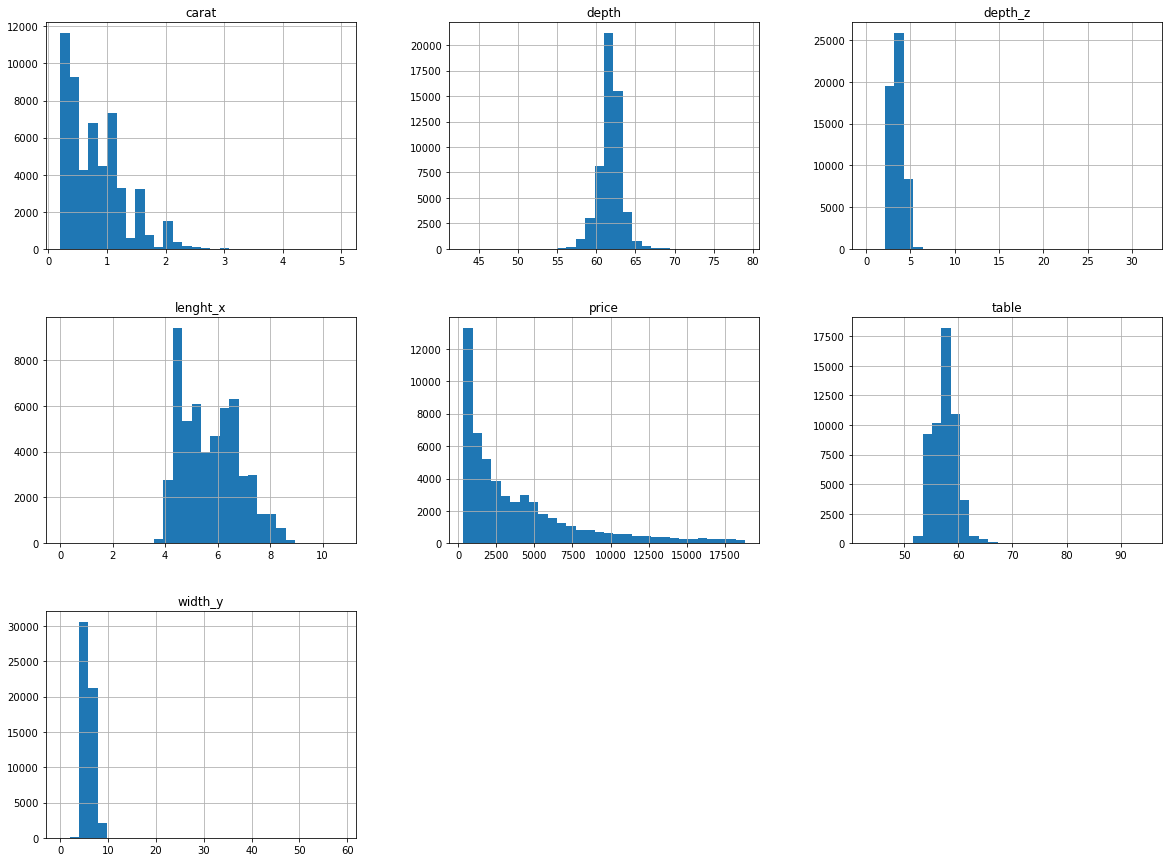

In [24]:
%matplotlib inline
diamonds.hist(bins=30, figsize=(20,15))
plt.show()

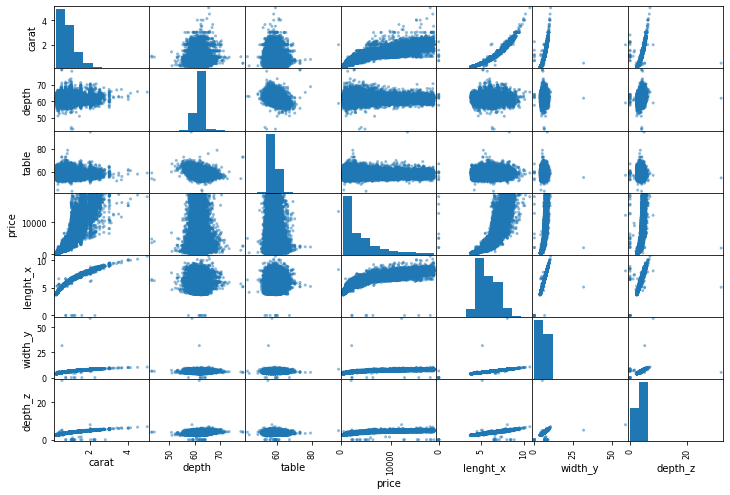

In [25]:
from pandas.plotting import scatter_matrix
attributes = ['carat', 'depth', 'table', 'price', 'lenght_x', 'width_y', 'depth_z']
scatter_matrix(diamonds[attributes], figsize=(12,8))
plt.show()

### Checking correlations

In [26]:
corr_matrix = diamonds.corr()

In [31]:
corr_matrix

,carat,depth,table,price,lenght_x,width_y,depth_z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
lenght_x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
width_y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
depth_z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [32]:
corr_matrix['price'].sort_values(ascending=False)

price       1.000000
carat       0.921591
lenght_x    0.884435
width_y     0.865421
depth_z     0.861249
table       0.127134
depth      -0.010647
Name: price, dtype: float64

In [33]:
corr_matrix['carat'].sort_values(ascending=False)

carat       1.000000
lenght_x    0.975094
depth_z     0.953387
width_y     0.951722
price       0.921591
table       0.181618
depth       0.028224
Name: carat, dtype: float64

1. Price is highly correlated with carat, lenght_x, depth_z and width_y. 
2. Table and depth are not very important features

In [ ]:
# split dataset to train and test set